# Iets met elektrische autos en uitstoot

Student namen: Amine Belhaj (14933632), Wouter van de Scheur (14611953), Sem Pothof (15854906), Nick Wester (15757579)

Groepsnummer: 50

In [1]:
# Load image from link
url = 'https://www.activlease.nl/media/uploads/image/tesla-cybertruck1-activlease.jpg'

# Display image from URL with smaller size and subtitle
from IPython.display import Image, display

# Set the desired image width and height
width = 600
height = 300

# Set the subtitle text
subtitle = "Foto van de Cybertruck. Bron: Active Lease"

# Create an Image instance with the URL
image = Image(url=url, width=width, height=height)

# Display the image and subtitle
display(image)
print(subtitle)

Foto van de Cybertruck. Bron: Active Lease


## Introductie

Klimaatverandering is één van de grootste uitdagingen van onze tijd. Overheden, bedrijven en burgers zoeken naar manieren om de CO₂-uitstoot terug te dringen. Elektrische voertuigen (EV’s) worden in dit kader vaak naar voren geschoven als een belangrijke stap in de energietransitie. Ze worden gezien als een schoner alternatief voor traditionele voertuigen die op fossiele brandstoffen rijden.
Maar hoe groot is de daadwerkelijke impact van EV’s op de wereldwijde CO₂-uitstoot? In dit dataverhaal onderzoeken we deze vraag aan de hand van twee verschillende perspectieven. Enerzijds is er optimisme: landen met een hoge adoptie van elektrische voertuigen zouden lagere uitstootcijfers laten zien. Anderzijds is er scepsis: de opmars van EV’s zou slechts een beperkte impact hebben zolang de elektriciteitsopwekking nog grotendeels afhankelijk is van fossiele brandstoffen. (Eventueel zou hier nog een stuk kunnen worden toegevoegd over de milieu-impact van accu-afbraak en of dit een (grote) negatieve of positieve invloed heeft op de CO₂-uitstoot.)
Om deze vraag te beantwoorden maken we gebruik van meerdere datasets die relevant zijn voor dit vraagstuk. De EDGAR-database rapporteert CO₂-uitstoot per sector per land. De IEA Global EV Explorer bevat wereldwijde verkoopcijfers en het marktaandeel van EV’s. (Je kunt hier eventueel nog extra gebruikte datasets benoemen.)
Aan de hand van een reeks visualisaties verkennen we hoe de wereldwijde transitie naar elektrisch rijden zich verhoudt tot veranderingen in CO₂-uitstoot — zowel binnen de transportsector als in totaal — om te bepalen wat de impact is van deze energietransitie.

## Dataset en voorverwerking

Om het verband te onderzoeken tussen de opkomst van elektrische voertuigen en de wereldwijde CO2-uitstoot.

## Eerste perspectief

In veel landen die voorlopen op de adoptie van elektrische voertuigen, zien we een opvallend en toekomstig beeld: de CO2 uistoot lijkt te dalen. Denk hierbij aan landen zoals Noorwegen, Nederland en Zweden. Dit kan aantonen dat elektrische voertuigen bijdragen aan het verminderen van de CO2-uitstoot.

### Eerste argument van het eerste perspectief

De CO2 uitstoot van personen auto's neemt af wanneer de EV sales stijgen.
Naarmate het aandeel EV’s in de nieuwverkopen toeneemt, daalt de gemiddelde uitstoot per verkochte auto. Dit komt doordat elektrische voertuigen tijdens het rijden geen directe CO2 uitstoten, in tegenstelling tot auto’s met een verbrandingsmotor. Dit betekend niet direct dat dit de oorzaak zou zijn, alleen zien we een zeer sterke correlatie.

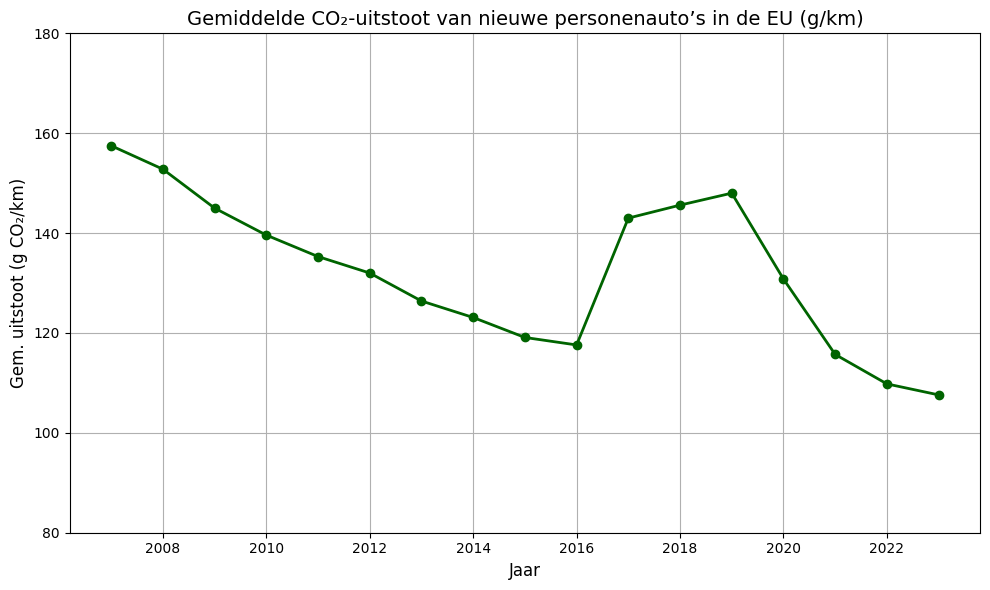

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("eea_s_eu-sdg-13-31_p_2000-2023_v01_r00(1).csv")


df_eu = df[df["geo_label"] == "European Union - 27 countries (from 2020)"]
df_eu = df_eu[df_eu["obs_value"].notna()]

df_eu["time"] = df_eu["time"].astype(int)
df_eu["obs_value"] = df_eu["obs_value"].astype(float)


plt.figure(figsize=(10, 6))
plt.plot(df_eu["time"], df_eu["obs_value"], marker='o', color='darkgreen', linewidth=2)
plt.title("Gemiddelde CO₂-uitstoot van nieuwe personenauto’s in de EU (g/km)", fontsize=14)
plt.xlabel("Jaar", fontsize=12)
plt.ylabel("Gem. uitstoot (g CO₂/km)", fontsize=12)
plt.ylim(80, 180)  # Y-as instellen
plt.grid(True)
plt.tight_layout()
plt.show()

> *Figure 1: Laat zien dat de gemiddelde uitsoot van persoonsauto's afneemt.*

Met de tweede diagram tonen we alleen aan dat er een toenamen is van electrische auto's, dit zegt op zich niet heel veel maar wanneer we deze vergelijken met figuur 1 zien we dus een sterke correlatie.

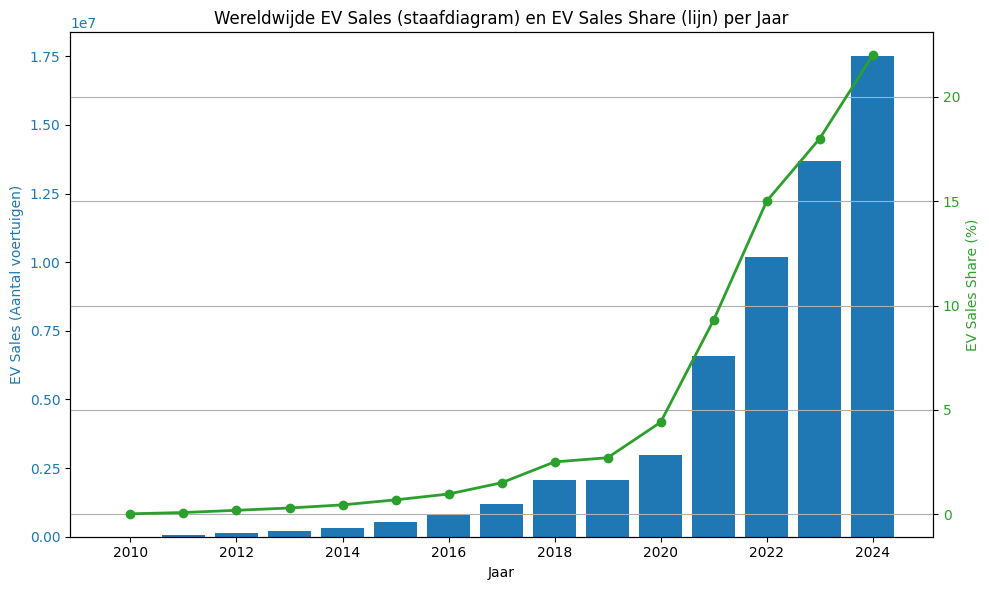

In [3]:
df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")


df_total_ev_sales = df[
    (df['region'] == 'World') &
    (df['parameter'] == 'EV sales') &
    (df['powertrain'].isin(['BEV', 'PHEV'])) &
    (df['unit'] == 'Vehicles')
].groupby('year')['value'].sum().reset_index()

df_total_ev_sales['parameter'] = 'EV sales'
df_total_ev_sales['unit'] = 'Vehicles'


df_sales_share = df[
    (df['region'] == 'World') &
    (df['parameter'] == 'EV sales share') &
    (df['powertrain'] == 'EV') &
    (df['unit'] == 'percent')
][['year', 'parameter', 'unit', 'value']]


df_combined = pd.concat([df_total_ev_sales, df_sales_share], ignore_index=True)


df_combined = df_combined.sort_values(by=['year', 'parameter']).reset_index(drop=True)

ev_sales = df_combined[df_combined['parameter'] == 'EV sales']
ev_share = df_combined[df_combined['parameter'] == 'EV sales share']


fig, ax1 = plt.subplots(figsize=(10, 6))


ax1.bar(ev_sales['year'], ev_sales['value'], color='tab:blue', label='EV Sales')
ax1.set_xlabel('Jaar')
ax1.set_ylabel('EV Sales (Aantal voertuigen)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')


ax2 = ax1.twinx()
ax2.plot(ev_share['year'], ev_share['value'], color='tab:green', marker='o', linewidth=2, label='EV Sales Share')
ax2.set_ylabel('EV Sales Share (%)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')


plt.title('Wereldwijde EV Sales (staafdiagram) en EV Sales Share (lijn) per Jaar')
fig.tight_layout()
plt.grid(True)
plt.show()

> *Figuur 2: Laat zien dat de verkoop van electrische autos toeneemt.*

Kortom: Wanneer electrische voertuigen toenemen daalt de transpoort uitstoot.

### Tweede argument van het eerste perspectief

De wereldkaart laat een interessante correlatie zien: landen met een hoog aandeel elektrische voertuigen (EV’s) hebben vaak ook een lagere transportgerelateerde CO₂ uitstoot per inwoner. Denk aan landen als Noorwegen, Nederland en Zweden, waar het EV-aandeel ver boven het wereldgemiddelde ligt en waar de uitstoot uit wegverkeer relatief laag is.

Omgekeerd zie je dat landen met een lage EV-adoptie, zoals veel opkomende economieën, een veel hogere CO₂-uitstoot uit transport blijven genereren. Dit komt deels door een grotere afhankelijkheid van verbrandingsmotoren en bijvoorbeeld een beperkte infrastructuur voor elektrisch rijden.

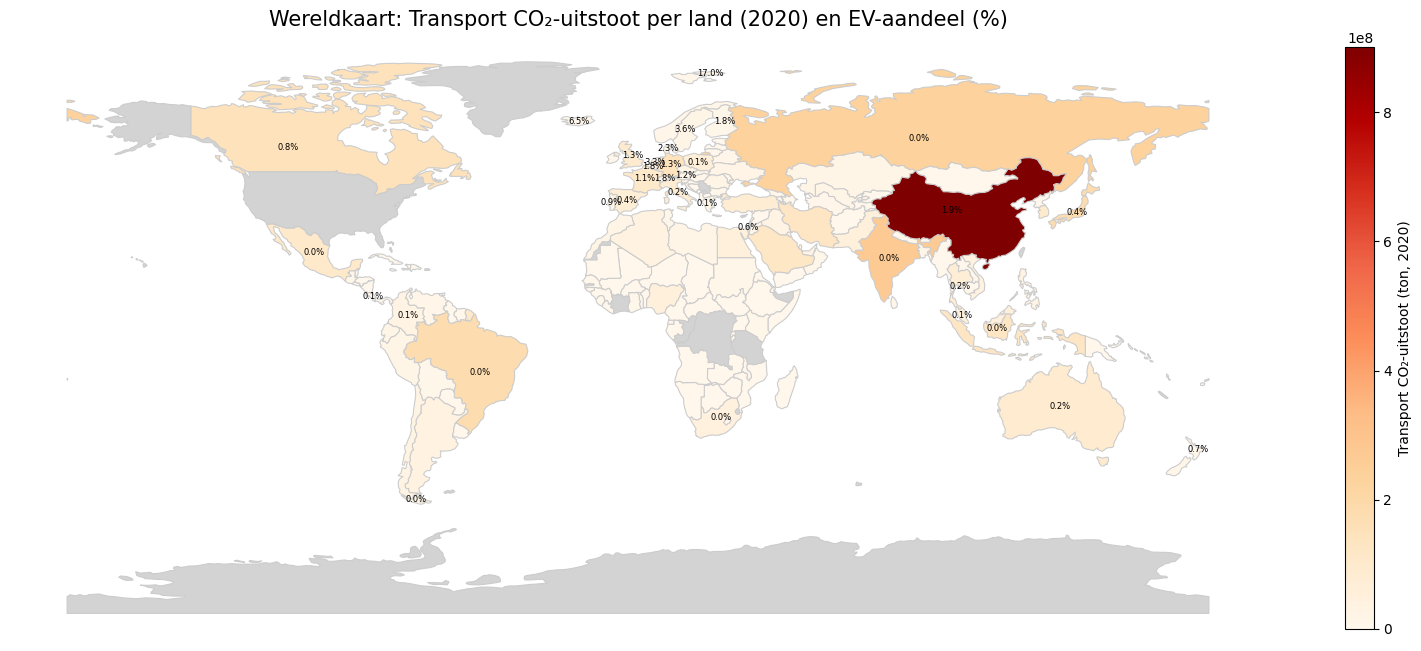

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Laad datasets (gebruik jouw CSV-bestanden)
co2_df = pd.read_csv("co-emissions-by-sector.csv")
ev_df = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")

# Filter CO2 voor 2020
co2_2020 = co2_df[(co2_df["Year"] == 2020) & (co2_df["Carbon dioxide emissions from transport"].notna())]
co2_2020 = co2_2020[["Entity", "Code", "Carbon dioxide emissions from transport"]].copy()
co2_2020.rename(columns={"Carbon dioxide emissions from transport": "transport_co2"}, inplace=True)

# Filter EV-aandeel voor 2020
ev_2020 = ev_df[
    (ev_df['parameter'] == 'EV stock share') &
    (ev_df['mode'] == 'Cars') &
    (ev_df['powertrain'] == 'EV') &
    (ev_df['year'] == 2020)
][['region', 'value']].copy()
ev_2020.rename(columns={'region': 'Entity', 'value': 'ev_share_percent'}, inplace=True)

# Merge
merged = pd.merge(co2_2020, ev_2020, on="Entity", how="left")

# Wereldkaart
world = gpd.read_file("110m_cultral_shp/ne_110m_admin_0_countries.shp")
world['centroid'] = world.representative_point()
world_map = world.merge(merged, left_on="ADMIN", right_on="Entity", how="left")

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
world_map.plot(column='transport_co2', cmap='OrRd', linewidth=0.8, edgecolor='0.8',
               legend=True, ax=ax, missing_kwds={"color": "lightgrey"},
               legend_kwds={'label': "Transport CO₂-uitstoot (ton, 2020)", 'shrink': 0.6})

for idx, row in world_map.iterrows():
    if pd.notna(row['ev_share_percent']):
        point = row['centroid']
        ax.text(point.x, point.y, f"{row['ev_share_percent']:.1f}%", fontsize=6,
                ha='center', va='center', color='black')

ax.set_title('Wereldkaart: Transport CO₂-uitstoot per land (2020) en EV-aandeel (%)', fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.savefig("wereldkaart_transport_co2_ev_share_2020.png", dpi=300)
plt.show()

> Figuur 3: Kleur van landen geeft de gemiddelde uistoot aan, de percentages van de landen geeft het percentage EVs weer. * Het figuur is nog niet volledig uitgewerkt.

### Derde argument van het eerste perspectief

In landen met een schone stroommix leidt EV-adoptie direct tot CO₂-reductie. De klimaatwinst van elektrische voertuigen hangt sterk af van de elektriciteitsmix waaruit ze worden opgeladen. In landen waar de meerderheid van de stroom uit hernieuwbare bronnen komt, dragen EV’s aantoonbaar bij aan het verlagen van de uitstoot.

De onderstaande grafiek toont de top 10 landen met het hoogste aandeel duurzame elektriciteitsproductie. In deze landen, zoals IJsland en Noorwegen, zijn elektrische voertuigen daadwerkelijk emissievrij in gebruik. In deze landen zorgt iedere EV die een fossiel voertuig vervangt direct voor een significante afname in uitstoot.

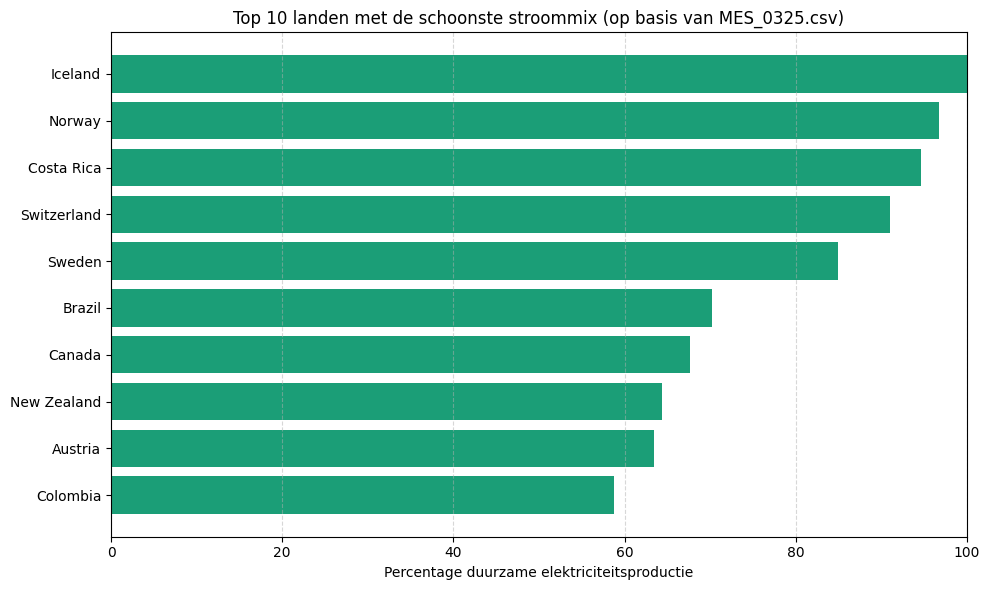

In [5]:
fossiel = ['Total Combustible Fuels', 'Natural Gas']
duurzaam = ['Hydro', 'Wind', 'Solar']

# 1. Laad en verwerk data
df = pd.read_csv("MES_0325.csv", skiprows=6, header=None, dtype={4: str}, low_memory=False)
df.columns = ['Country', 'Time', 'Balance', 'Product', 'Value', 'Unit']
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
df = df[df['Balance'] == 'Net Electricity Production']

# Groepeer per land en product, tel alle waarden op
grouped = df.groupby(['Country', 'Product'])['Value'].sum().reset_index()

# Maak een draaitabel waarbij elke rij een land is
pivot = grouped.pivot(index='Country', columns='Product', values='Value').fillna(0)

# Voeg kolommen toe voor totaal per categorie
pivot['Fossiel'] = pivot[fossiel].sum(axis=1)
pivot['Duurzaam'] = pivot[duurzaam].sum(axis=1)

# Bereken het totale stroomverbruik per land (fossiel + duurzaam)
pivot['Totaal'] = pivot['Fossiel'] + pivot['Duurzaam']

# Bereken percentage duurzaam
pivot['% Duurzaam'] = (pivot['Duurzaam'] / pivot['Totaal']) * 100

# Sorteer van hoog naar laag
pivot_sorted = pivot.sort_values(by='% Duurzaam', ascending=False)


import matplotlib.pyplot as plt

# Pak top 10 landen met hoogste % duurzaam
top_duurzaam = pivot_sorted.head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_duurzaam.index[::-1], top_duurzaam['% Duurzaam'][::-1], color='#1b9e77')

plt.xlabel('Percentage duurzame elektriciteitsproductie')
plt.title('Top 10 landen met de schoonste stroommix (op basis van MES_0325.csv)')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Tweede perspectief

Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Aenean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Donec quam felis, ultricies nec, pellentesque eu, pretium quis, sem. Nulla consequat massa quis enim. Donec pede justo, fringilla vel, aliquet nec, vulputate eget, arcu.

### Eerste argument van het tweede perspectief 

Ondanks de stijgende adoptie van elektrische voertuigen (EV's), blijft de wereldwijde CO₂-uitstoot door transport vrijwel gelijk. De grafiek toont aan hoe het martkaandeel van EV's tussen 2010 en 2023 exponentieel stijgt van minder dan 1% naar ruim 17%. Tegerlijkertijd blijven de trsansportemissies schommellen tussen de 7 en 8 miljoen kiloton CO₂ per jaar. Uit de visualisatie blijkt dat de scherpe toename in EV-adoptie geen directe daling van de uitstoot veroorzaakt. Terwijl de lijn in de grafiek snel stijgt, blijven de oranje balken vrijwel constant in hoogte. Dit roept vragen op over de daadwerkelijke impact van elektrische mobiliteit op emissiereductie. De grafiek benadrukt hiermee dat de sterke groei in EV-adoptie alleen niet voldoende lijkt om de uitstoot significant te verlagen. Verdere maatregelen en structurele veranderingen in het transportsysteem zijn nodig om echt effect te hebben op CO₂-uitstoot.

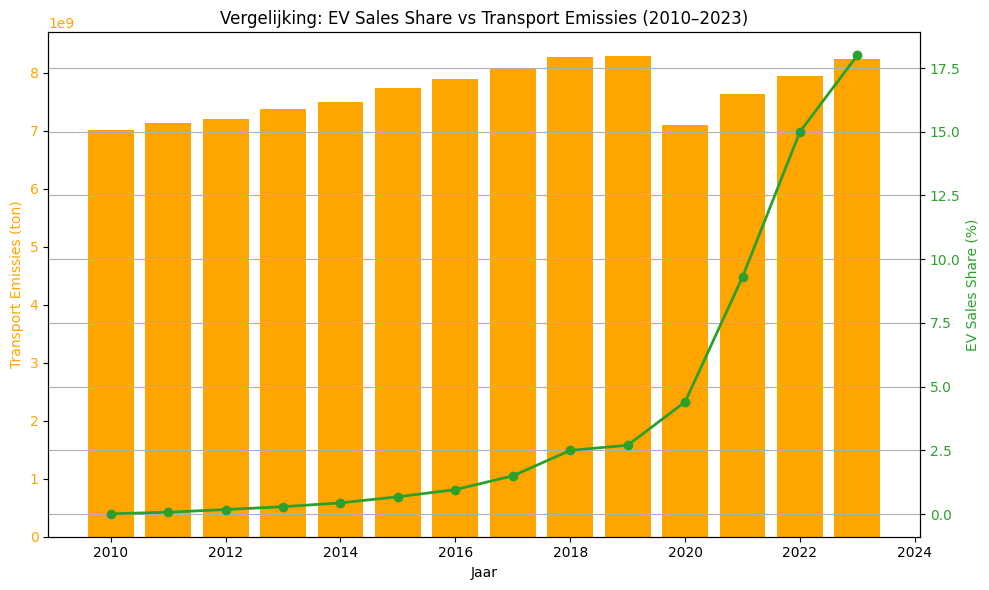

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Laad de geüploade dataset
df_emission = pd.read_csv("emission_aggregated1_renamed.csv")

# Maak een dataframe met transport emissies per jaar
df_transport = df_emission[['year', 'Transport']].copy()
df_transport = df_transport.rename(columns={'Transport': 'Transport Emissions'})

# Haal EV sales share data op en hernoem kolommen voor merge
ev_share_plot = df_combined[df_combined['parameter'] == 'EV sales share'][['year', 'value']].rename(columns={'value': 'EV Sales Share'})

# Merge de twee datasets op jaar
df_compare = pd.merge(df_transport, ev_share_plot, on='year')

# Maak dezelfde visualisatie opnieuw met aangepaste kleur voor transport emissies
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linkeras: CO2-uitstoot door transport (nu oranje)
ax1.bar(df_compare['year'], df_compare['Transport Emissions'], color='orange', label='Transport Emissions')
ax1.set_xlabel('Jaar')
ax1.set_ylabel('Transport Emissies (ton)', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

# Rechteras: EV sales share
ax2 = ax1.twinx()
ax2.plot(df_compare['year'], df_compare['EV Sales Share'], color='tab:green', marker='o', linewidth=2, label='EV Sales Share')
ax2.set_ylabel('EV Sales Share (%)', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Titel en layout
plt.title('Vergelijking: EV Sales Share vs Transport Emissies (2010–2023)')
fig.tight_layout()
plt.grid(True)
plt.show()

> *Figure 4: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

### The Second Argument of Your Second Perspective

Hoewel elektrische voertuigen lokaal geen uitstoot veroorzaken, is de elektriciteit die wordt gebruikt voor het opladen vaak nog grotendeels afkomstig uit fossiele brandstoffen. Hierdoor blijft de totale CO2-reductie deels beperkt zolang de energiemix onvoldoende verduurzaamt. Uit de grafiek blijkt dat de fossiele elektriciteitsproductie jaarlijks afneemt, maar nog altijd aanzienlijk hoger is dan de duurzame opwekking.

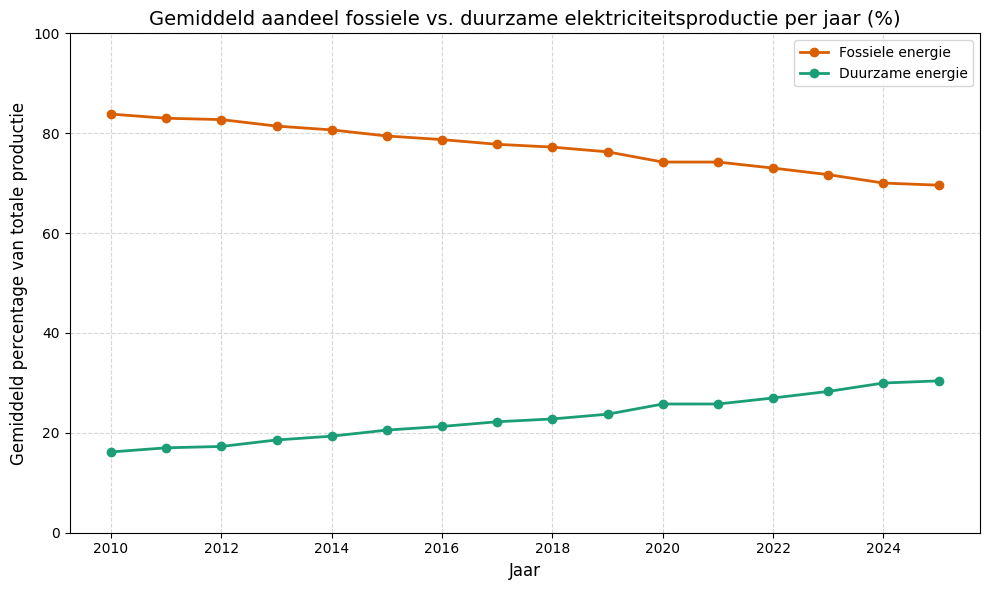

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 2. Definieer energietypes
fossiel = ['Total Combustible Fuels', 'Natural Gas']
duurzaam = ['Hydro', 'Wind', 'Solar']
relevant = fossiel + duurzaam
df = df[df['Product'].isin(relevant)]

# 3. Groepeer wereldwijd per maand en bereken totaal
df_world = df.groupby(['Time', 'Product'])['Value'].sum().reset_index()
pivot = df_world.pivot_table(index='Time', columns='Product', values='Value', aggfunc='sum').fillna(0)

# 4. Voeg samen tot categorieën
pivot['Fossiel'] = pivot[fossiel].sum(axis=1)
pivot['Duurzaam'] = pivot[duurzaam].sum(axis=1)
result = pivot[['Fossiel', 'Duurzaam']]

# 5. Zet index naar datetime en bereken percentage
result.index = pd.to_datetime(result.index, format='%B %Y', errors='coerce')
result = result.dropna().sort_index()
row_sums = result.sum(axis=1).replace(0, pd.NA)
result_percent = result.div(row_sums, axis=0) * 100
result_percent = result_percent.fillna(0)

# 6. Gemiddeld per jaar
result_percent['Year'] = result_percent.index.year
yearly_avg = result_percent.groupby('Year')[['Fossiel', 'Duurzaam']].mean()

# 7. Plot de jaarlijkse lijnen
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg['Fossiel'], label='Fossiele energie', color='#d95f02', marker='o', linewidth=2)
plt.plot(yearly_avg.index, yearly_avg['Duurzaam'], label='Duurzame energie', color='#1b9e77', marker='o', linewidth=2)

plt.title("Gemiddeld aandeel fossiele vs. duurzame elektriciteitsproductie per jaar (%)", fontsize=14)
plt.ylabel("Gemiddeld percentage van totale productie", fontsize=12)
plt.xlabel("Jaar", fontsize=12)
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> *Figure 5: Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.*

In enim justo, rhoncus ut, imperdiet a, venenatis vitae, justo. Nullam dictum felis eu pede mollis pretium. Integer tincidunt. Cras dapibus. Vivamus elementum semper nisi. Aenean vulputate eleifend tellus. Aenean leo ligula, porttitor eu, consequat vitae, eleifend ac, enim. Aliquam lorem ante, dapibus in, viverra quis, feugiat a, tellus.

## References

Centraal Bureau voor de Statistiek. (2023). More strikes but fewer strikers in 2022. Statistics Netherlands. https://www.cbs.nl/en-gb/news/2023/18/more-strikes-but-fewer-strikers-in-2022